# Part 7. 머신러닝 데이터 분석

## 1. 머신러닝 개요

### 1-1. 머신러닝이란?

머신러닝: 기계(컴퓨터 알고리즘) 스스로 데이터를 학습하여 서로 다른 변수 간의 관계를 찾아 나가는 과정  
예측(prediction), 분류(classification), 군집(clustering) 알고리즘 등으로 분류된다.  

### 1-2. 지도 학습 vs 비지도 학습

지도 학습: 정답 데이터(Y)를 다른 데이터와 함께 컴퓨터 알고리즘에 입력하는 방식 
-> 정답을 맞춰보면서 문제를 풀어가는 학습 방법  
비지도 학습: 정답 데이터 없이 컴퓨터 알고리즘 스스로 데이터로부터 숨은 패턴을 찾아내는 방식  
-> 정답지 없이 스스로 답을 찾는 학습 방법  

구분  | 지도 학습(supervised learning) | 비지도 학습(unsupervised learning)
-------|-------------------------------|-----------------------------------
알고리즘(분석모형) | 회귀분석, 분류   | 군집분석 
특징               | 정답을 알고있는 상태에서 학습 |정답이 없는 상태에서 서로 비슷한 데이터를 찾아서 그룹화
                   |모형 평가 방법이 다양한 편 |  모형 평가 방법이 제한적
                   

### 1-3. 머신러닝 프로세스

머신러닝 데이터 분석을 시작하기 전, 컴퓨터 알고리즘이 이해할 수 있는 형태로 데이터를 변환하는 작업이 선행되어야한다.  
분석 대상에 관해 수집한 관측값을 속성을 기준으로 정리해야하기 때문에 판다스를 이용해 데이터프레임으로 정리해야한다.  

이 후  여러 속성(변수) 간의 관계를 분석해 결과를 예측하는 모형을 학습을 통해 찾는다.  
모형 학습에 사용하는 데이터를 훈련데이터라고 부른다.  
학습을 마친 모형의 예측 능력을 평가하기 위한 데이터를 검증 데이터라고 말한다.  
검증 과정을 통해 학습을 마친 모형의 예측 능력을 평가하고, 평가 결과를 바탕으로 최종 모형을 확정하여 문제 해결에 적용한다.  


데이터 정리 -> 데이터 분리(훈련/검증) -> 알고리즘 준비 -> 모형 학습(훈련 데이터) -> 예측(검증 데이터) -> 모형 평가 -> 모형 활용


## 2. 회귀분석

설명(독립) 변수 -(학습)-> 머신러닝 알고리즘 -(예측)-> 예측(종속) 변수

### 2-1. 단순회귀분석

두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘  
수학적으로 종속 변수 Y와 독립 변수 X 사이의 관계를 1차함수 Y=aX+b 로 나타낸다.  

즉, 변수 X와 Y에 대한 정보를 가지고, 일차방정식의 계수 a, b를 찾는 과정이 단순회귀분석 알고리즘이다.  

* Step 1 - 데이터 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
             'acceleration', 'model year', 'origin', 'name']

print(df.head())
print('\n')

# 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0  

* Step 2 - 데이터 탐색  

데이터에 대한 기본적인 정보 확인

In [2]:
print(df.info())
print('\n')

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000 

In [3]:
# horsepower 열의 자료형 변경(문자열 -> 숫자)
print(df['horsepower'].unique())
print('\n')

df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

print(df.describe())

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1

* Step 3 - 속성 선택  

단순회귀분석에 변수로 사용할 후보 열을 선택.  
예측 목표인 종속 변수(Y)가 될 'mpg'열과 독립 변수(X)로 사용할 후보로 3개의 열을 포함한다.

In [4]:
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


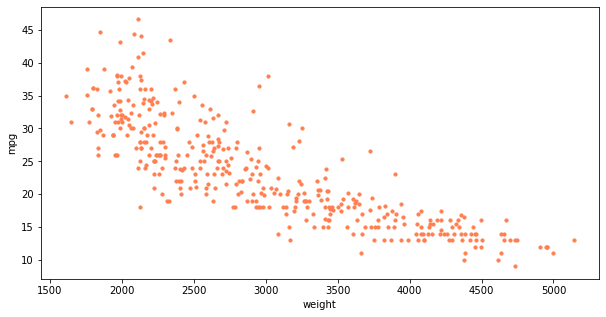

In [5]:
# 종속 변수와 다른 변수 간의 선형관계를 그래프로 확인

ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()

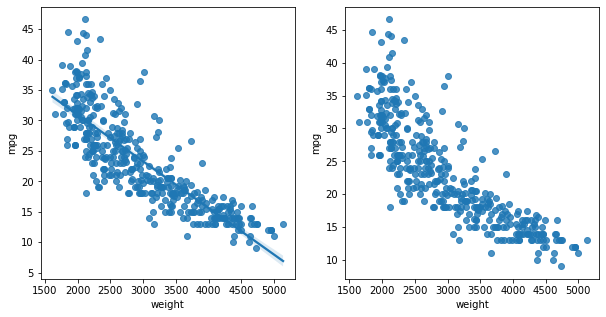

In [6]:
# seaborn으로 산점도 그리기

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False) # 회귀선 미표시
plt.show()
plt.close()

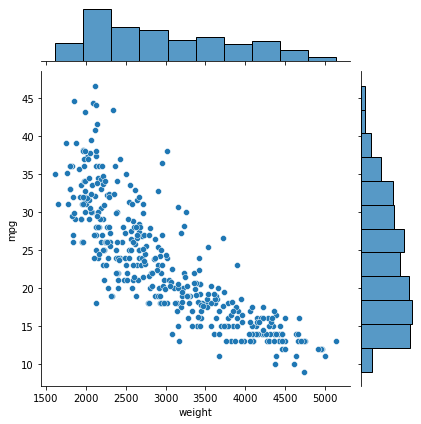

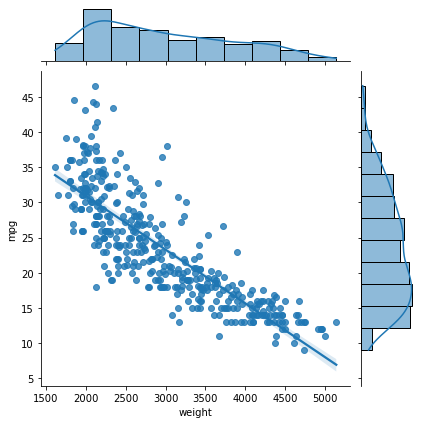

In [7]:
# seaborn 조인트 그래프 - 산점도, 히스토그램

sns.jointplot(x='weight', y='mpg', data=ndf)
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)
plt.show()
plt.close()

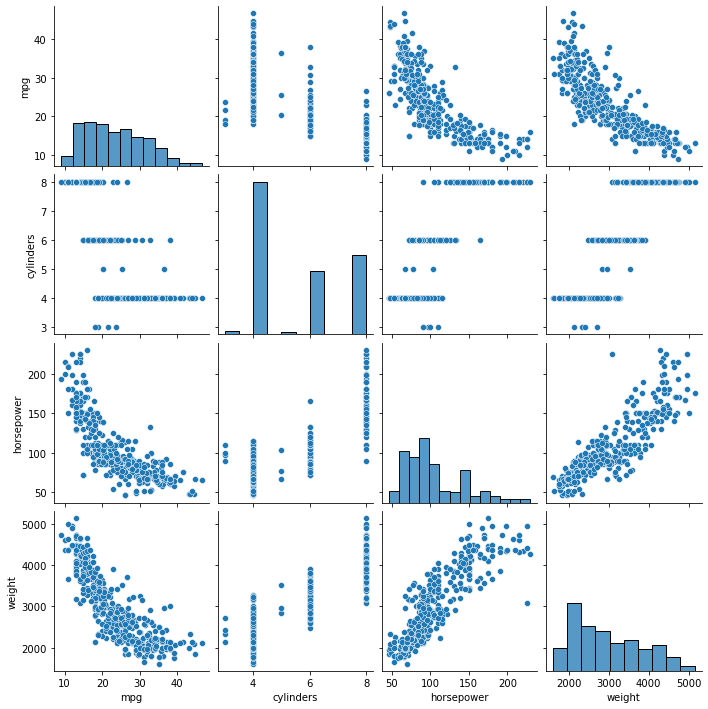

In [8]:
# seaborn pairplot()으로 두 변수 간의 모든 경우의 수 그리기(자기 자신과의 관계는 히스토그램)

grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

* Step 4 - 훈련/검증 데이터 분할  

'mpg'열과 선형 관계를 보이는 'horsepower'열, 'weight'열을 독립 변수 X로 선택하는 것을 고려한다.  
예제는 'weight'열을 독립 변수 X로 선택하고 데이터를 7:3의 비율로 분할한다.

In [9]:
X = ndf[['weight']]
y = ndf[['mpg']]

# train data와 test data로 구분(7:3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


* Step 5 - 모형 학습 및 검증  

sklearn 라이브러리에서 선형회귀분석 모듈을 사용한다.

In [10]:
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용해 결정계수 계산
r_square = lr.score(X_test, y_test)
print(r_square)

0.6822458558299325


In [11]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b: ', lr.intercept_)

기울기 a:  [[-0.00775343]]


y절편 b:  [46.71036626]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


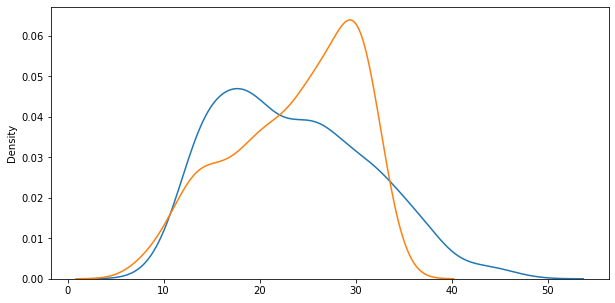

In [12]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
plt.close()

==> 결과: 실제 값은 왼쪽으로 편향, 예측값은 반대로 오른쪽으로 편중되어있다.  
따라서 독립변수와 종속 변수 사이에 선형관계가 있지만 모형의 오차를 더 줄여야한다.  
앞서 그린 산점도를 확인해 보면 직선보다는 곡선의 형태가 더 적합해 보이므로 비선형 회귀분석을 통해 모형의 정확도를 높일 수 있다.

### 2-2. 다항회귀분석

독립변수 X와 종속변수 Y 사이에 선형의 상관관계가 있지만, 직선보다는 곡선으로 설명하는 것이 적합할 때에는 단순회귀분석은 부적합하다.  
이럴 때 다항 함수를 사용하면 보다 복잡한 곡선 형태의 회귀선을 표현할 수 있다.  
다항회귀분석: 2차함수 이상의 다항 함수를 이용해 두 변수 간의 선형관계를 설명하는 알고리즘  

* 데이터 준비

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
             'acceleration', 'model year', 'origin', 'name']

df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

X = ndf[['weight']]
y = ndf[['mpg']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


* 모형 학습 및 검증  

sklearn 라이브러리에서 선형회귀분석을 위한 LinearRegression() 함수와 다항식 변환을 위한 PolynomialFeatures() 함수를 불러온다.  


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 다항식 변환(X를 2차항으로 변형)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


In [15]:
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
print(r_square)

0.7087009262975685


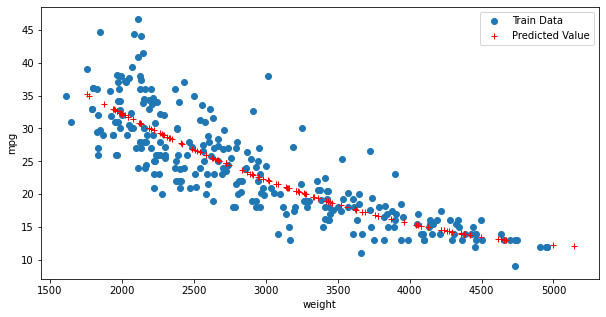

In [16]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력

y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')          # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value')  # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


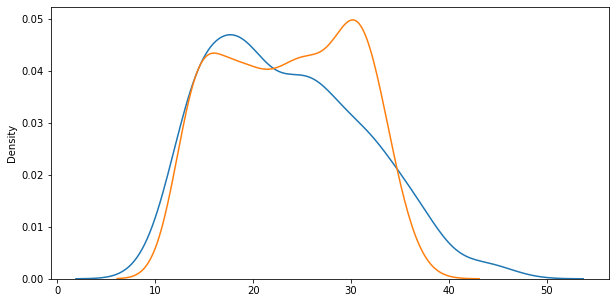

In [17]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
plt.close()

==> 결과: 결정계수 값도 향상되었고, 그래프를 보면 단순회귀분석의 결과와 비교할 때 데이터가 어느 한쪽으로 편향되는 경향이 상당히 감소한 것을 알 수 있다. 따라서 더 적합한 모형이라고 볼 수 있다.

### 2-3. 다중회귀분석

다중회귀분석: 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우 사용하는 분석법  

* 데이터 준비  

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
             'acceleration', 'model year', 'origin', 'name']

df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

X = ndf[['cylinders', 'horsepower', 'weight']]
y = ndf[['mpg']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)


* 모형 학습 및 검증

In [19]:
# 단순회귀분석 모형 - sklearn 사용

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

# 회귀식의 기울기
print('X 변수의 계수 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('상수항 b: ', lr.intercept_)

0.6939048496695597


X 변수의 계수 a:  [[-0.60691288 -0.03714088 -0.00522268]]


상수항 b:  [46.41435127]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


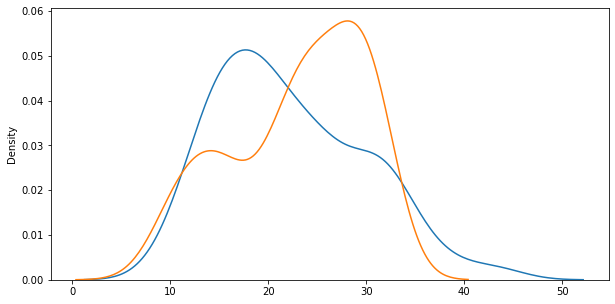

In [20]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label='y_test')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
plt.close()

==> 결과: 단순회귀분석의 결과와 비교할 때 데이터가 어느 한쪽으로 편향되는 경향은 그대로 남아 있지만 그래프의 첨도(뾰족한 정도)가 약간 누그러진 것을 볼 수 있다.

## 3. 분류

분류 알고리즘은 예측하려는 대상의 속성(설명 변수)을 입력 받고, 목표 변수가 갖고 있는 카테고리(범주형) 값 중에서 어느 한 값으로 분류하여 예측한다.  
훈련 데이터에 목표 변수 값(0 또는 1)을 함께 입력하기 때문에 지도 학습 유형에 속하는 알고리즘이다.  
KNN, SVM, Decision Tree, Logistic Regression 등 다양한 알고리즘이 존재한다.

### 3-1. KNN

KNN은 k-Nearest-Neighbors의 약칭으로 k개의 가까운 이웃이라는 뜻이다.  
새로운 관측값이 주어지면 기존 데이터 중에서 가장 속성이 비슷한 k개의 이웃을 먼저 찾는다.  
가까운 이웃들이 갖고 있는 목표 값과 같은 값으로 분류하여 예측한다.  

k값에 따라 예측의 정확도가 달라지므로, 적절한 k값을 찾는 것이 매우 중요하다.  

* Step 1 - 데이터 준비

In [21]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')

print(df.head())
print('\n')

pd.set_option('display.max_columns', 15)
print(df.head())

   survived  pclass     sex   age  sibsp  ...  adult_male  deck  embark_town  \
0         0       3    male  22.0      1  ...        True   NaN  Southampton   
1         1       1  female  38.0      1  ...       False     C    Cherbourg   
2         1       3  female  26.0      0  ...       False   NaN  Southampton   
3         1       1  female  35.0      1  ...       False     C  Southampton   
4         0       3    male  35.0      0  ...        True   NaN  Southampton   

  alive  alone  
0    no  False  
1   yes  False  
2   yes   True  
3   yes  False  
4    no   True  

[5 rows x 15 columns]


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0 

* Step 2 - 데이터 탐색

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [23]:
# NaN값이 많은 deck 열 삭제, embarked와 내용이 겹치는 embark_town 열 삭제

rdf = df.drop(['deck', 'embark_town'], axis=1)
print(rdf.columns.values)

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']


In [24]:
# age열에 나이 데이터가 없는 모든 행 삭제 

rdf = rdf.dropna(subset=['age'], how='any', axis=0)
print(len(rdf))

714


In [25]:
# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기(누락 데이터가 2개 뿐이므로)

most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
print(most_freq)
print('\n')

print(rdf.describe(include='all'))
print('\n')

rdf['embarked'].fillna(most_freq, inplace=True)

S


          survived      pclass   sex         age       sibsp       parch  \
count   714.000000  714.000000   714  714.000000  714.000000  714.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   453         NaN         NaN         NaN   
mean      0.406162    2.236695   NaN   29.699118    0.512605    0.431373   
std       0.491460    0.838250   NaN   14.526497    0.929783    0.853289   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    1.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    2.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    1.000000   
max       1.000000    3.000000   NaN   80.000000    5.000000    6.000000   

              fare embarked  class  who adult_male alive alone  
count   714.000000

* Step 3 - 속성 선택  

In [26]:
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
print(ndf.head())

   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S


In [27]:
# 원핫인코딩(더미변수 만들기) - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환

onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town') # 열 이름에 접두어 town 붙이기
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
print(ndf.head())

   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1


* Step 4 - 훈련/검증 데이터 분할  


In [28]:
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
         'town_C', 'town_Q', 'town_S']]
y = ndf['survived']

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


> **분류 모형의 예측력을 평가하는 지표**  
> 1. Confusion Matrix  
> 2. 정확도(Precision)  
> True로 예측한 분석 대상 중 실제 값이 True인 비율  
> 3. 재현율(Recall)  
> 실제 값이 True인 분석 대상 중 True로 예측해 모형이 적중한 비율(모형의 완전성)  
> 4. F1 지표(F1-score)  
> 정확도와 재현율이 균등하게 반영될 수 있도록 정확도와 재현율의 조화평균을 계산한 값, 모형의 예측력을 종합적으로 평가하는 지표

* Step 5 - 모형 학습 및 검증  

sklearn 라이브러리의 neighbors 모듈을 사용한다.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성(k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [30]:
# 모형 성능 평가 - Confusion Matrix 계산 

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

[[109  16]
 [ 25  65]]


In [31]:
# 모형 성능 평가 - 평가 지표 계산

knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       125
           1       0.80      0.72      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



### 3-2. SVM 

SVM은 Support Vector Machine의 약자로, 벡터 개념을 가져와서 사용한다.  
데이터프레임의 각 열은 열 벡터 형태로 구현되며, 각각 고유의 축을 갖는 벡터 공간을 만드는데, 분석 대상이 되는 개별 관측값은 모든 속성(열 벡터)에 관한 값을 해당 축의 좌표로 표시하여 벡터 공간에서의 위치를 나타낸다.  

SVM 모형은 학습을 통해 벡터 공간을 나누는 경계를 찾는다.

* 데이터 준비

In [32]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')

rdf = df.drop(['deck', 'embark_town'], axis=1)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)

most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
rdf['embarked'].fillna(most_freq, inplace=True)

ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town') 
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)

X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
         'town_C', 'town_Q', 'town_S']]
y = ndf['survived']

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


* 모형 학습 및 검증

sklearn에서 가져온 svm 모듈의 SVC() 함수를 사용하여 모형 객체를 생성한다.  
데이터를 벡터 공간으로 매핑하는 함수를 커널(kernel)이라고 하는데, kernel='rbf'옵션으로 RBF(Radial Basis Function) 함수를 적용한다.  
이 외에는 Linear, Polynomial, Sigmoid 등의 커널이 있다.

In [33]:
from sklearn import svm

svm_model = svm.SVC(kernel='rbf')

svm_model.fit(X_train, y_train)

y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [34]:
from sklearn import metrics
svm_matrix = metrics.confusion_matrix(y_test, y_hat)
print(svm_matrix)
print('\n')

svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)

[[120   5]
 [ 35  55]]


              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



### 3-3. Decision Tree  

컴퓨터 알고리즘에서 즐겨 사용하는 트리 구조를 사용하고, 각 분기점(node)에는 분석 대상의 속성(설명 변수)들이 위치한다.  
각 분기점마다 목표 값을 가장 잘 분류할 수 있는 속상을 찾아서 배치하고, 해당 속성이 갖는 값을 이용하여 새로운 가지(branch)를 만든다.  
각 분기점에서 최적의 속성을 선택할 때는 해당 속성을 기준으로 분류한 값들이 구분되는 정도를 측정한다.   
다른 종류의 값들이 섞여 있는 정도를 나타내는 Entropy를 주로 활용하는데, Entropy가 낮을수록 분류가 잘 된것이다.(손실, 불순도)  

Entropy가 일정 수준 이하로 낮아질 때까지 앞의 과정을 반복한다.

* 데이터 준비

In [35]:
import pandas as pd
import numpy as np

# Breast Cancer 데이터셋 가져오기
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

df.columns = ['id','clump','cell_size','cell_shape','adhesion','epithlial',
             'bare_nuclei','chromatin','normal_nucleoli','mitoses','class']

pd.set_option('display.max_columns', 15)

print(df.head())
print('\n')

print(df.info())
print('\n')

print(df.describe())

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   cl

In [36]:
# bare_nuclei 열의 자료형 변경(문자열 -> 숫자)

print(df['bare_nuclei'].unique())
print('\n')

df['bare_nuclei'].replace('?', np.nan, inplace=True)
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

print(df.describe())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


                 id       clump   cell_size  cell_shape    adhesion  \
count  6.830000e+02  683.000000  683.000000  683.000000  683.000000   
mean   1.076720e+06    4.442167    3.150805    3.215227    2.830161   
std    6.206440e+05    2.820761    3.065145    2.988581    2.864562   
min    6.337500e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.776170e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171795e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238705e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

        epithlial  bare_nuclei   chromatin  normal_nucleoli     mitoses  \
count  683.000000   683.000000  683.000000       683.000000  683.000000   
mean     3.234261     3.544656    3.445095         2.869693    1.603221   
std      2.223085     3.643857    2.449697         3.052666    1.732674   
min      1.

In [37]:
X = df[['clump','cell_size','cell_shape','adhesion','epithlial',
        'bare_nuclei','chromatin','normal_nucleoli','mitoses']]
y = df[['class']]

# 설명 변수 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (478, 9)
test data 개수:  (205, 9)


* 모형 학습 및 검증  

sklearn 라이브러리의 tree 모듈을 임포트 한다.

In [38]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5) # 트리 레벨 5로 지정, 5단계까지 가지를 확장할 수 있다.

tree_model.fit(X_train, y_train)

y_hat = tree_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[4 4 4 4 4 4 2 2 4 4]
[[4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [2]
 [2]
 [4]
 [4]]


In [39]:
from sklearn import metrics
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)
print('\n')

tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)

[[127   4]
 [  2  72]]


              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



## 4. 군집

군집(clustering) 분석은 데이터셋의 관측값이 갖고 있는 여러 속성을 분석해 서로 비슷한 특징을 갖는 관측값끼리 같은 집단으로 묶는 알고리즘이다.  
다른 클러스터 간에는 서로 완전하게 구분되는 특징을 갖기 때문에 어느 클러스터에도 속하지 못하는 관측값이 존재할 수 있다.  
이런 특성을 이용하여 특이 데이터(이상값, 중복값 등)를 찾는데 활용하기도 한다.  

군집 분석은 비지도학습 유형이다. 분류 알고리즘과 비슷하지만 군집 분석을 정답이 없는 상태에서 데이터 자체의 유사성만을 기준으로 판단한다는 점에서 분류 알고리즘과는 차이가 있다.  

<img src='군집분석.jpg' style='width:500px;'>

활용 - 신용카드 부정 사용 탐지, 구매 패턴 분석 등 소비자 행동 특성 그룹화 (-> 새로운 소비자의 구매 패턴이나 행동 예측)


### 4-1. k-Means

데이터 간의 유사성을 측정하는 기준으로 각 클러스터의 중심까지의 거리를 이용한다.  
벡터 공간에 위치한 어떤 데이터에 대하여 k개의 클러스터가 주어졌을 때 클러스터의 중심까지 거리가 가장 가까운 클러스터로 해당 데이터를 할당한다.  
다른 클러스터 간에는 서로 완전하게 구분하기 위해 일정한 거리 이상 떨어져야 한다.  

몇 개의 클러스터로 데이터를 구분할 것인지를 결정하는 k 값에 따라 모형의 성능이 달라진다.  
일반적으로 k가 클수록 모형의 정확도는 개선되지만, k값이 너무 커지면 선택지가 너무 많아지므로 분석의 효과가 사라진다.

<img src='https://blog.kakaocdn.net/dn/bkECov/btqEAMDc6RK/rBSggFFHQkR0GsA0MSGaKK/img.png' style='width:500px;'>

* 데이터 준비  



In [40]:
import pandas as pd 
import matplotlib.pyplot as plt

# Wholesale customers 데이터셋 가져오기
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)

print(df.head()) 
print('\n')

print(df.info())
print('\n')

print(df.describe())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen

==> 데이터프레임 전체를 모형의 학습 데이터로 사용한다.  
비지도 학습 모형이므로 예측 변수를 지정할 필요가 없고 필요한 속성을 모두 설명 변수로 활용한다.  
데이터 정규화를 통해 서로 다른 변수에 존재할 수 있는 데이터 값의 상대적 크기 차이에서 발생하는 오류를 제거한다.

In [41]:
X = df.iloc[:, :]
print(X[:5])
print('\n')

# 설명 변수 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


* 모형 학습 및 검증  

sklearn 라이브러리의 cluster 모듈을 활용한다.  
(매번 실행할 때마다 예측값의 결과가 달라지는 점 유의 -> random_state)

In [42]:
from sklearn import cluster

# 모형 객체 생성
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10, random_state=10)

# 모형 학습
kmeans.fit(X)

# 예측(군집)
cluster_label = kmeans.labels_ # 구분한 클러스터 값 입력됨(0~4)
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())

[2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 2 1 1 3 2 2 1 1 2 1 1 1 1 1 1 2 1
 2 2 1 1 1 2 2 2 2 2 3 2 2 1 1 2 2 1 1 3 2 1 1 2 3 2 2 1 3 1 2 1 1 1 1 1 2
 2 1 1 2 1 1 1 2 2 1 2 3 3 1 1 1 1 1 3 1 2 1 2 1 1 1 2 2 2 1 1 1 2 2 2 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 2 2 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 1 4 1
 1 1 1 2 2 1 1 1 2 1 1 0 2 0 0 2 2 0 0 0 2 0 0 0 2 0 3 0 0 2 0 2 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 2 0 0 0 0 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0 2
 0 2 2 0 2 2 2 2 2 2 2 0 0 2 0 0 2 0 0 2 0 0 0 2 0 0 0 0 0 4 0 0 0 0 0 2 0
 3 0 2 0 0 0 0 2 2 1 2 1 1 2 2 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 2 2 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1]


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656    

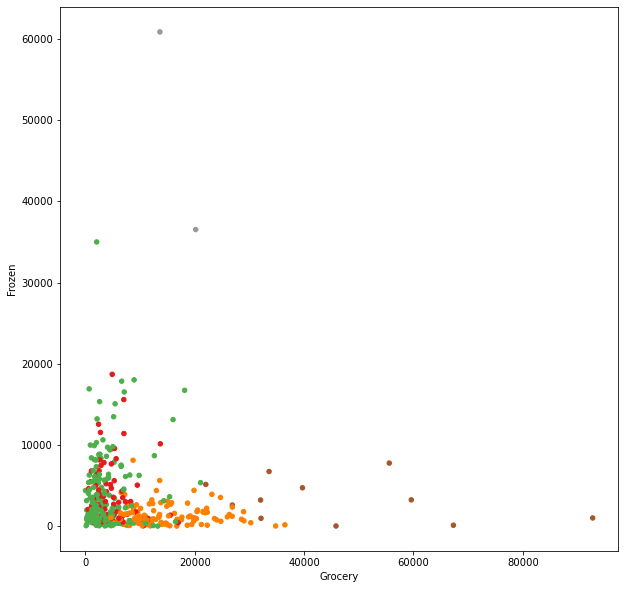

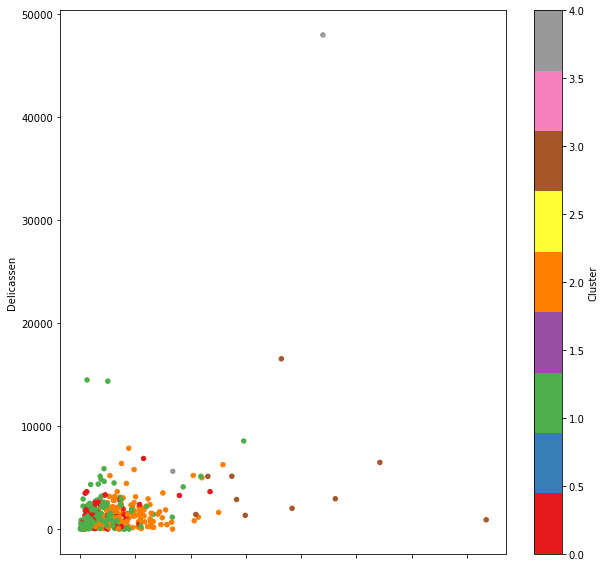

In [43]:
# 8개의 변수를 하나의 그래프로 표현할 수 없기 때문에 2개의 변수 선택
# 그래프로 표현 - 시각화

df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1',
       colorbar=False, figsize=(10,10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1',
       colorbar=True, figsize=(10,10))
plt.show()
plt.close()

==> 다른 값들에 비해 지나치게 큰 값으로 구성되는 클러스터를 제외한 후 다시 그려보자.  
데이터들이 몰려 있는 구간을 확대해 자세하게 파악할 수 있다. 


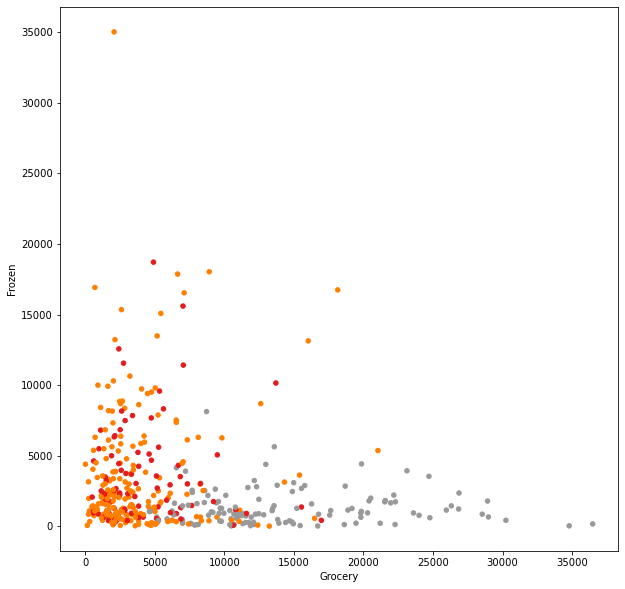

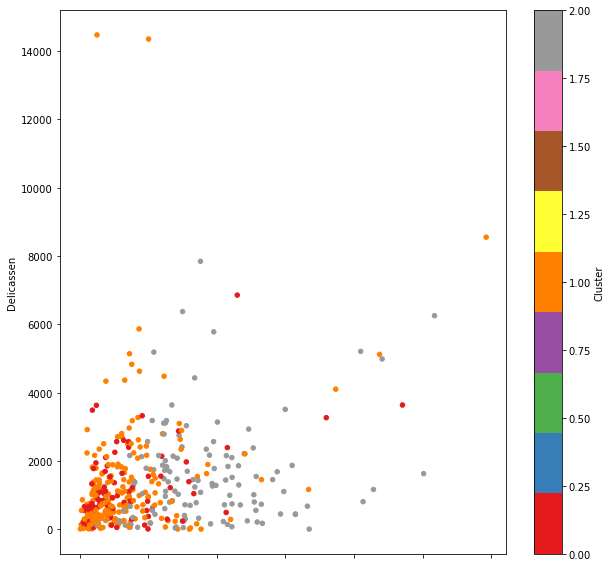

In [44]:
# 큰 값으로 구성된 클러스터 (3, 4) 제외 - 값이 몰려 있는 구간을 자세하게 분석

mask = (df['Cluster'] == 3) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1',
       colorbar=False, figsize=(10,10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1',
       colorbar=True, figsize=(10,10))
plt.show()
plt.close()

### 4-2. DBSCAN(밀도 기반 클러스터링)

데이터가 위치하고 있는 공간 밀집도를 기준으로 클러스터를 구분한다.  
자신을 중심으로 반지름 R의 공간에 최소 M개의 포인트가 존재하는 점을 **코어 포인트**라고 부른다.  
코어 포인트는 아니지만 반지를 R안에 다른 코어 포인트가 있을 경우 **경계 포인트(border point)**라고 한다.  
코어 포인트도 아니고 경계 포인트에도 속하지 않는 점을 **Noise**(또는 outlier)라고 분류한다.  

하나의 클러스터는 반지름 R 안에 서로 위치하는 모든 코어 포인트를 포함하는 방식으로 구성된다.  
당연히 각 코어 포인트 주위에 있는 경계 포인트를 포함한다.  
서로 밀접한 데이터끼리 하나의 클러스터를 구성하게 되고, 어느 클러스터에도 속하지 않는 점들은 Noise로 남게 된다.

<img src='https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FI1FR2%2Fbtrs706lbtJ%2F0dcdKvMZKAtKeIF8yvswG1%2Fimg.png' style='width:500px;'>

* 데이터 준비

In [45]:
import pandas as pd
import folium

file_path = './2016_middle_shcool_graduates_report.xlsx'

# 데이터프레임으로 변환
df = pd.read_excel(file_path, header=0)

# IPython console 디스플레이 옵션 설정하기
pd.set_option('display.width', None)                        # 출력 화면의 너비
pd.set_option('display.max_rows', 100)                      # 출력할 행의 개수 한도
pd.set_option('display.max_columns', 10)                    # 출력할 열의 개수 한도
pd.set_option('display.max_colwidth', 20)                   # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)     # 유니코드 사용 너비 조정

# Unnamed: 0 열 제거
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# 열 이름 배열 출력
print(df.columns.values)

['지역' '학교명' '코드' '유형' '주야' '남학생수' '여학생수' '일반고' '특성화고' '과학고' '외고_국제고'
 '예고_체고' '마이스터고' '자사고' '자공고' '기타진학' '취업' '미상' '위도' '경도']


In [46]:
print(df.head())
print('\n')

print(df.info())
print('\n')

print(df.describe())

     지역                               학교명  코드  유형  주야  ...  \
0  성북구  서울대학교사범대학부설중학교.....       3  국립  주간  ...   
1  종로구  서울대학교사범대학부설여자중학교...     3  국립  주간  ...   
2  강남구           개원중학교                     3  공립  주간  ...   
3  강남구           개포중학교                     3  공립  주간  ...   
4  서초구           경원중학교                     3  공립  주간  ...   

   기타진학  취업   미상       위도        경도  
0     0.004     0  0.000  37.594942  127.038909  
1     0.031     0  0.000  37.577473  127.003857  
2     0.009     0  0.003  37.491637  127.071744  
3     0.019     0  0.000  37.480439  127.062201  
4     0.010     0  0.000  37.510750  127.008900  

[5 rows x 20 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      415 non-null    object 
 1   학교명     415 non-null    object 
 2   코드      415 non-null    int64  
 3   유형      415 non-null    object 
 4   주야     

'위도'와 '경도' 열을 folium.CircleMarker() 함수에 전달하면 각 위치를 지도에 원형 마커로 표시한다.  
'학교명' 열을 popup 옵션에 할당해 원형 마커를 클릭할 때 학교명이 팝업으로 표시되도록 설정한다.

In [47]:
# 지도에 위치 표시
mschool_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain',
                        zoom_start=12)

# 중학교 위치 정보를 CircleMarker로 표시
for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                       radius=5,
                       color='brown',      # 원의 둘레 색상
                       fill=True,
                       fill_color='coral', # 원을 채우는 색
                       fill_opacity=0.7,   #투명도
                       popup=name
    ).add_to(mschool_map)

mschool_map

In [48]:
# 원핫인코딩(더미 변수)
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

onehot_location = label_encoder.fit_transform(df['지역'])
onehot_code = label_encoder.fit_transform(df['코드'])
onehot_type = label_encoder.fit_transform(df['유형'])
onehot_day = label_encoder.fit_transform(df['주야'])

df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

print(df.head())

     지역                               학교명  코드  유형  주야  ...  \
0  성북구  서울대학교사범대학부설중학교.....       3  국립  주간  ...   
1  종로구  서울대학교사범대학부설여자중학교...     3  국립  주간  ...   
2  강남구           개원중학교                     3  공립  주간  ...   
3  강남구           개포중학교                     3  공립  주간  ...   
4  서초구           경원중학교                     3  공립  주간  ...   

         경도  location  code  type  day  
0  127.038909        16     0     1    0  
1  127.003857        22     0     1    0  
2  127.071744         0     0     0    0  
3  127.062201         0     0     0    0  
4  127.008900        14     0     0    0  

[5 rows x 24 columns]


> **OneHotEncoder()** vs **LabelEncoder()**  

* 모형 학습 및 검증  

'과학고', '외고_국제고', '자사고' 열을 선택해 설명 변수 X로 할당한다.  
그 후 정휴화 처리 하고 cluster 모듈의 DBSCAN() 적용해 분석을 실행한다.  
(eps: 밀도 계산의 기준, 반지름/ min_samples: 최소 포인트 개수)

In [49]:
from sklearn import cluster

columns_list = [9,10,13]
X = df.iloc[:, columns_list]
print(X[:5])
print('\n')

X = preprocessing.StandardScaler().fit(X).transform(X)

# DBSCAN 모형 객체 생성
dbm = cluster.DBSCAN(eps=0.2, min_samples=5)

# 모형 학습
dbm.fit(X)

# 예측
cluster_label = dbm.labels_
print(cluster_label)
print('\n')

df['Cluster'] = cluster_label
print(df.head())

   과학고  외고_국제고  자사고
0   0.018        0.007   0.227
1   0.000        0.035   0.043
2   0.009        0.012   0.090
3   0.013        0.013   0.065
4   0.007        0.010   0.282


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  2 -1  0 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0  3 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  1  0
 -1 -1 -1  0 -1 -1 -1 -1  0 -1  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1
 -1 -1  0 -1 -1 -1  0  2  0  0  0  0  0 -1 -1 -1  0 -1  0 -1 -1  0 -1  0
 -1  0  0 -1 -1 -1 -1  1  0 -1  0  0 -1 -1 -1  0 -1 -1 -1 -1 -1  0  1 -1
 -1  0  2  0 -1 -1  1 -1 -1 -1  0  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1 -1
 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0  0 -1 -1 -1 -1 -1  0 -1  0  0 -1 -1
 -1 -1 -1  0 -1 -1 -1  1  0  3  1 -1  0  0 -1  0 -1 -1  0  0  2 -1 -1  3
  0  0 -1 -1 -1 -1  0 -1  0  0 -1  0  0  0 -1 -1  0 -1 -1 -1 -1 -1  2  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1  3  0  2 -1 -1
 -1 -1  0 -1 -1 -1  

-1, 0, 1, 2, 3의 5개의 cluster가 존재한다. -1은 Noise를 나타내므로 모형이 구분한 클러스터는 모두 4개가 된다.  
cluster 별로 다른 색으로 구분해 지도에 그룹별 분포를 살펴보자.


In [50]:
# 클러스터 값으로 그룹화하고 그룹별로 내용 출력

grouped_cols = [0, 1, 3] + columns_list
grouped = df.groupby('Cluster')
for key, group in grouped:
    print('* key: ', key)
    print('* number: ', len(group))
    print(group.iloc[:, grouped_cols].head())
    print('\n')

* key:  -1
* number:  255
     지역                               학교명  유형  과학고  외고_국제고  \
0  성북구  서울대학교사범대학부설중학교.....    국립   0.018        0.007   
1  종로구  서울대학교사범대학부설여자중학교...  국립   0.000        0.035   
2  강남구           개원중학교                  공립   0.009        0.012   
3  강남구           개포중학교                  공립   0.013        0.013   
4  서초구           경원중학교                  공립   0.007        0.010   

   자사고  
0   0.227  
1   0.043  
2   0.090  
3   0.065  
4   0.282  


* key:  0
* number:  102
      지역          학교명  유형  과학고  외고_국제고  자사고
13  서초구  동덕여자중학교  사립     0.0        0.022   0.038
22  강남구      수서중학교  공립     0.0        0.019   0.044
28  서초구      언남중학교  공립     0.0        0.015   0.050
34  강남구      은성중학교  사립     0.0        0.016   0.065
43  송파구      거원중학교  공립     0.0        0.021   0.054


* key:  1
* number:  45
         지역          학교명  유형  과학고  외고_국제고  자사고
46     강동구      동신중학교  사립     0.0          0.0   0.044
103    양천구      신원중학교  공립     0.0          0.0   0.006
118    구로구     

In [51]:
# 그래프로 표현 - 시각화

colors = {-1:'gray', 0:'coral', 1:'blue', 2:'green', 3:'red', 4:'purple',
         5:'orange', 6:'brown', 7:'brick', 8:'yellow', 9:'magenta', 10:'cyan'}

cluster_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain',
                        zoon_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster):
    folium.CircleMarker([lat, lng],
                       radius=5,
                       color=colors[clus],      # 원의 둘레 색상
                       fill=True,
                       fill_color=colors[clus], # 원을 채우는 색
                       fill_opacity=0.7,   #투명도
                       popup=name
    ).add_to(cluster_map)

cluster_map

앞에서 사용한 속성에 학교 설립 유형(국립, 공립, 사립)을 추가하여 분석한다.  
'type'열에 원핫벡터 형태로 정리된 값을 사용한다.

In [52]:
# X2 데이터셋에 대하여 위의 과정을 반복

columns_list2 = [9,10,13,22]
X2 = df.iloc[:, columns_list2]
print(X2[:5])
print('\n')

X2 = preprocessing.StandardScaler().fit(X2).transform(X2)

# DBSCAN 모형 객체 생성
dbm2 = cluster.DBSCAN(eps=0.2, min_samples=5)

# 모형 학습
dbm2.fit(X2)

# 예측
df['Cluster2'] =  dbm2.labels_
print(df.head())

   과학고  외고_국제고  자사고  type
0   0.018        0.007   0.227     1
1   0.000        0.035   0.043     1
2   0.009        0.012   0.090     0
3   0.013        0.013   0.065     0
4   0.007        0.010   0.282     0


     지역                               학교명  코드  유형  주야  ...  code  \
0  성북구  서울대학교사범대학부설중학교.....       3  국립  주간  ...     0   
1  종로구  서울대학교사범대학부설여자중학교...     3  국립  주간  ...     0   
2  강남구           개원중학교                     3  공립  주간  ...     0   
3  강남구           개포중학교                     3  공립  주간  ...     0   
4  서초구           경원중학교                     3  공립  주간  ...     0   

   type  day  Cluster  Cluster2  
0     1    0       -1        -1  
1     1    0       -1        -1  
2     0    0       -1        -1  
3     0    0       -1        -1  
4     0    0       -1        -1  

[5 rows x 26 columns]


In [53]:
grouped2_cols = [0, 1, 3] + columns_list2
grouped2 = df.groupby('Cluster2')
for key, group in grouped2:
    print('* key: ', key)
    print('* number: ', len(group))
    print(group.iloc[:, grouped2_cols].head())
    print('\n')
    
# ==> Noise(-1) 증가, cluster 11개로 구분

* key:  -1
* number:  281
     지역                               학교명  유형  과학고  외고_국제고  \
0  성북구  서울대학교사범대학부설중학교.....    국립   0.018        0.007   
1  종로구  서울대학교사범대학부설여자중학교...  국립   0.000        0.035   
2  강남구           개원중학교                  공립   0.009        0.012   
3  강남구           개포중학교                  공립   0.013        0.013   
4  서초구           경원중학교                  공립   0.007        0.010   

   자사고  type  
0   0.227     1  
1   0.043     1  
2   0.090     0  
3   0.065     0  
4   0.282     0  


* key:  0
* number:  8
       지역      학교명  유형  과학고  외고_국제고  자사고  type
22   강남구  수서중학교  공립     0.0        0.019   0.044     0
43   송파구  거원중학교  공립     0.0        0.021   0.054     0
51   송파구  방이중학교  공립     0.0        0.021   0.068     0
93   강서구  방원중학교  공립     0.0        0.019   0.057     0
164  중랑구  원묵중학교  공립     0.0        0.020   0.062     0


* key:  1
* number:  59
      지역      학교명  유형  과학고  외고_국제고  자사고  type
28  서초구  언남중학교  공립     0.0        0.015   0.050     0
47  강동구  둔촌중학교  공립

In [54]:
cluster2_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain',
                        zoon_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster2):
    folium.CircleMarker([lat, lng],
                       radius=5,
                       color=colors[clus],      # 원의 둘레 색상
                       fill=True,
                       fill_color=colors[clus], # 원을 채우는 색
                       fill_opacity=0.7,   #투명도
                       popup=name
    ).add_to(cluster2_map)

cluster2_map

In [55]:
# X3 데이터셋(과학고, 외고_국제고)에 대하여 위의 과정을 반복

columns_list3 = [9,10]
X3 = df.iloc[:, columns_list3]
print(X3[:5])
print('\n')

X3 = preprocessing.StandardScaler().fit(X3).transform(X3)

# DBSCAN 모형 객체 생성
dbm3 = cluster.DBSCAN(eps=0.2, min_samples=5)

# 모형 학습
dbm3.fit(X3)

# 예측
df['Cluster3'] = dbm3.labels_
print(df.head())

   과학고  외고_국제고
0   0.018        0.007
1   0.000        0.035
2   0.009        0.012
3   0.013        0.013
4   0.007        0.010


     지역                               학교명  코드  유형  주야  ...  type  \
0  성북구  서울대학교사범대학부설중학교.....       3  국립  주간  ...     1   
1  종로구  서울대학교사범대학부설여자중학교...     3  국립  주간  ...     1   
2  강남구           개원중학교                     3  공립  주간  ...     0   
3  강남구           개포중학교                     3  공립  주간  ...     0   
4  서초구           경원중학교                     3  공립  주간  ...     0   

   day  Cluster  Cluster2  Cluster3  
0    0       -1        -1        -1  
1    0       -1        -1         0  
2    0       -1        -1         1  
3    0       -1        -1        -1  
4    0       -1        -1         1  

[5 rows x 27 columns]


In [56]:
grouped3_cols = [0, 1, 3] + columns_list3
grouped3 = df.groupby('Cluster3')
for key, group in grouped3:
    print('* key: ', key)
    print('* number: ', len(group))
    print(group.iloc[:, grouped3_cols].head())
    print('\n')
    
# ==> Noise 감소, 7개의 클러스터로 구분

* key:  -1
* number:  61
     지역                             학교명  유형  과학고  외고_국제고
0  성북구  서울대학교사범대학부설중학교.....  국립   0.018        0.007
3  강남구           개포중학교                공립   0.013        0.013
6  강남구         압구정중학교                공립   0.015        0.036
7  강남구  단국대학교사범대학부속중학교.....  사립   0.032        0.005
8  강남구           대명중학교                공립   0.013        0.029


* key:  0
* number:  160
      지역                               학교명  유형  과학고  외고_국제고
1   종로구  서울대학교사범대학부설여자중학교...  국립     0.0        0.035
13  서초구       동덕여자중학교                  사립     0.0        0.022
22  강남구           수서중학교                  공립     0.0        0.019
28  서초구           언남중학교                  공립     0.0        0.015
29  강남구           언북중학교                  공립     0.0        0.007


* key:  1
* number:  111
      지역      학교명  유형  과학고  외고_국제고
2   강남구  개원중학교  공립   0.009        0.012
4   서초구  경원중학교  공립   0.007        0.010
5   강남구  구룡중학교  공립   0.007        0.007
11  강남구  대치중학교  공립   0.007        0.024
14  서초

In [57]:
cluster3_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain',
                        zoon_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster3):
    folium.CircleMarker([lat, lng],
                       radius=5,
                       color=colors[clus],      # 원의 둘레 색상
                       fill=True,
                       fill_color=colors[clus], # 원을 채우는 색
                       fill_opacity=0.7,   #투명도
                       popup=name
    ).add_to(cluster3_map)

cluster3_map